✅ Data Loaded Successfully!

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Township      2000 non-null   object 
 1   Area          2000 non-null   object 
 2   State         2000 non-null   object 
 3   Tenure        2000 non-null   object 
 4   Type          2000 non-null   object 
 5   Median_Price  2000 non-null   float64
 6   Median_PSF    2000 non-null   float64
 7   Transactions  2000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 125.1+ KB
None

📈 First 5 Rows:
                      Township           Area   State     Tenure  \
0          SCIENTEX SUNGAI DUA  Tasek Gelugor  Penang   Freehold   
1                 BANDAR PUTRA          Kulai   Johor   Freehold   
2  TAMAN LAGENDA TROPIKA TAPAH    Chenderiang   Perak   Freehold   
3       SCIENTEX JASIN MUTIARA         Bemban  Melaka   Freeh

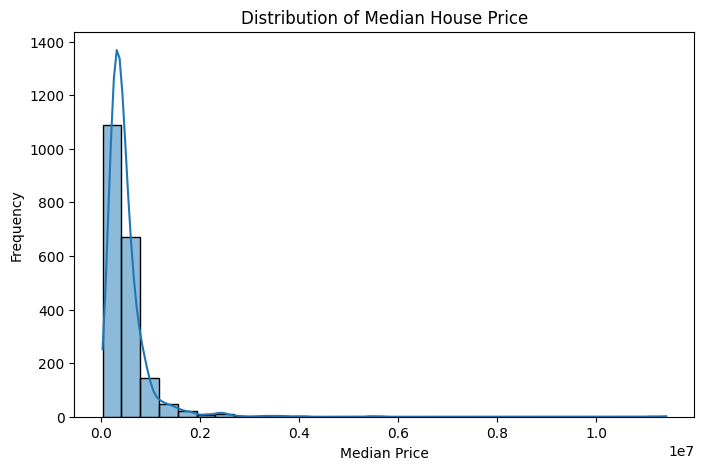

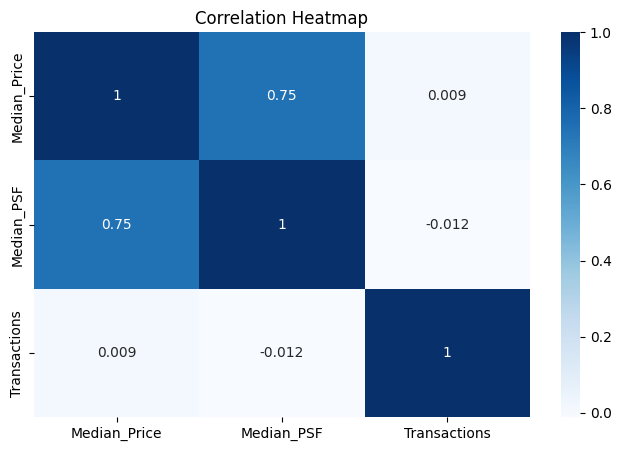

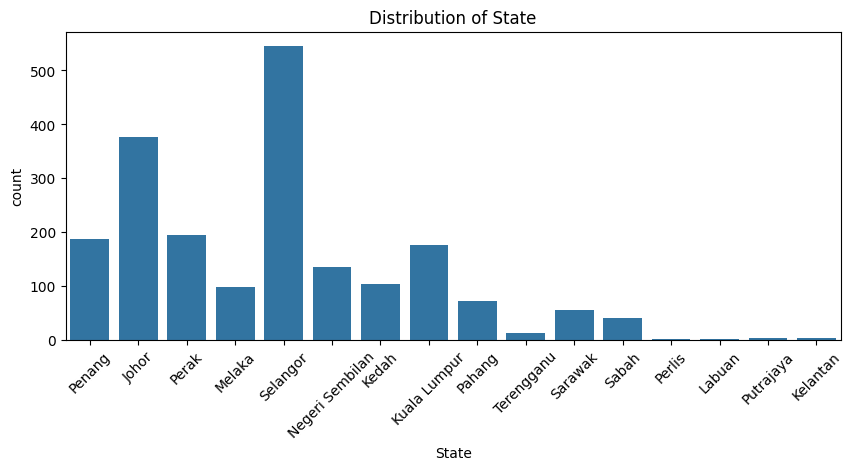

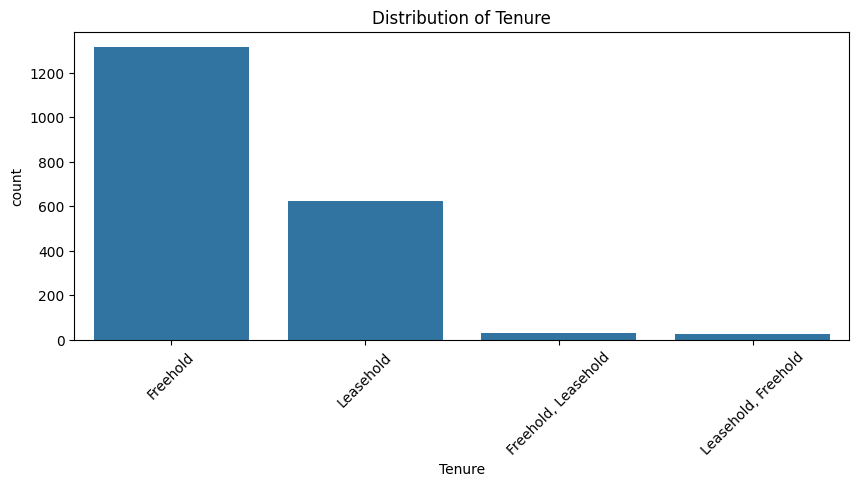

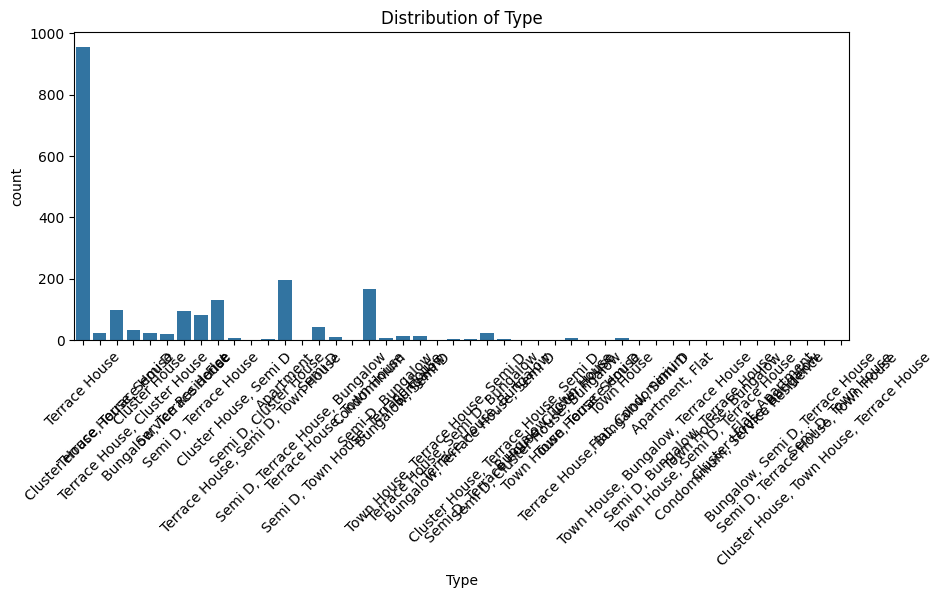


📊 Model Evaluation:
R2 Score: 0.4091
MAE: 179569.36
MSE: 103944869698.51
RMSE: 322404.82

🏆 Feature Importance (Linear Coefficients):
        Feature  Coefficient
4          Type  3120.403208
5    Median_PSF  2025.623063
6  Transactions    94.406936
1          Area    92.557094
0      Township    12.312962
2         State  -488.916735
3        Tenure -7833.241686


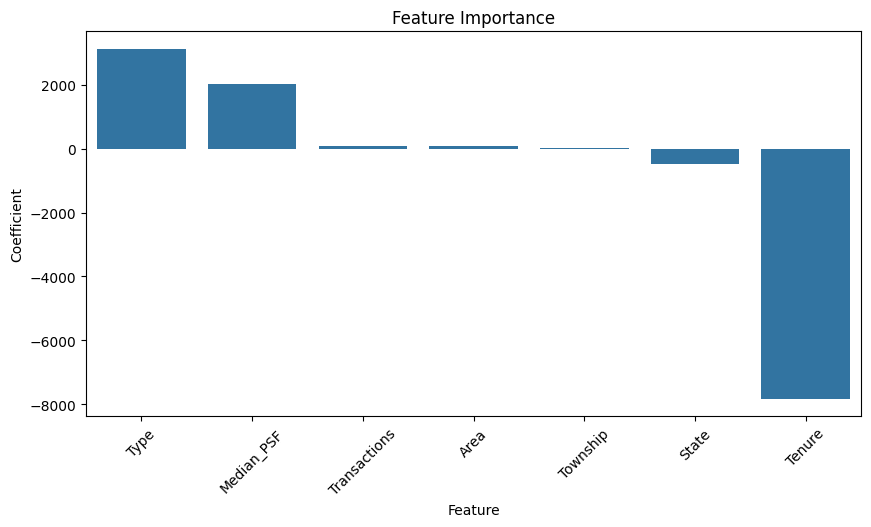


🔮 Predicted Prices for Test Set (First 10):
Actual: 165000.00, Predicted: 206690.01
Actual: 380000.00, Predicted: 207363.36
Actual: 1853500.00, Predicted: 2227781.75
Actual: 550000.00, Predicted: 746897.61
Actual: 700000.00, Predicted: 548928.24
Actual: 592500.00, Predicted: 265013.36
Actual: 599800.00, Predicted: 311683.90
Actual: 289000.00, Predicted: 266418.82
Actual: 640000.00, Predicted: 717180.60
Actual: 378000.00, Predicted: 882523.38

🏠 Predicted Price for Example House: RM 513262.42


In [2]:
# =======================
# 📊 HOUSE PRICE PREDICTION PROJECT
# =======================

# 🔹 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# =======================
# 📥 Load the Dataset
# =======================
df = pd.read_csv(r"C:\Users\shetg\Downloads\Q21_Housing prices regression-20251101T205107Z-1-001\Q21_Housing prices regression\malaysia_house_price_data_2025.csv")  # ensure file is in same folder
print("✅ Data Loaded Successfully!")

# =======================
# 📌 Basic Exploration
# =======================
print("\n📊 Dataset Info:")
print(df.info())
print("\n📈 First 5 Rows:")
print(df.head())
print("\n❌ Missing Values:")
print(df.isnull().sum())

# =======================
# 🧹 Handle Missing Values (if any)
# =======================
df = df.dropna()
print("\n✅ After removing missing values, shape:", df.shape)

# =======================
# 📊 EDA - Exploratory Data Analysis
# =======================
plt.figure(figsize=(8,5))
sns.histplot(df['Median_Price'], bins=30, kde=True)
plt.title('Distribution of Median House Price')
plt.xlabel('Median Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

cat_columns = ['State', 'Tenure', 'Type']
for col in cat_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# =======================
# 🧠 Feature Engineering
# =======================
encoder = LabelEncoder()
for col in ['Township', 'Area', 'State', 'Tenure', 'Type']:
    df[col] = encoder.fit_transform(df[col])

# =======================
# ✂️ Feature Selection
# =======================
X = df.drop('Median_Price', axis=1)
y = df['Median_Price']

# =======================
# 🧪 Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================
# 🤖 Regression Model
# =======================
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# =======================
# 📊 Evaluation
# =======================
print("\n📊 Model Evaluation:")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# =======================
# 💡 Feature Importance
# =======================
importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
importance = importance.sort_values(by='Coefficient', ascending=False)
print("\n🏆 Feature Importance (Linear Coefficients):")
print(importance)

plt.figure(figsize=(10,5))
sns.barplot(data=importance, x='Feature', y='Coefficient')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

# =======================
# 🔮 Price Prediction
# =======================
y_pred_test = model.predict(X_test)
print("\n🔮 Predicted Prices for Test Set (First 10):")
for i in range(min(10, len(y_pred_test))):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred_test[i]:.2f}")

def predict_house_price(township, area, state, tenure, type_, median_psf, transactions):
    input_data = pd.DataFrame({
        'Township': [encoder.transform([township])[0] if township in encoder.classes_ else -1],
        'Area': [encoder.transform([area])[0] if area in encoder.classes_ else -1],
        'State': [encoder.transform([state])[0] if state in encoder.classes_ else -1],
        'Tenure': [encoder.transform([tenure])[0] if tenure in encoder.classes_ else -1],
        'Type': [encoder.transform([type_])[0] if type_ in encoder.classes_ else -1],
        'Median_PSF': [median_psf],
        'Transactions': [transactions]
    })
    predicted_price = model.predict(input_data)[0]
    return predicted_price

# Example usage
example_township = 'SCIENTEX SUNGAI DUA'
example_area = 'Tasek Gelugor'
example_state = 'Penang'
example_tenure = 'Freehold'
example_type = 'Terrace House'
example_median_psf = 304.0
example_transactions = 593

predicted_price = predict_house_price(
    example_township, example_area, example_state, example_tenure, 
    example_type, example_median_psf, example_transactions
)
print(f"\n🏠 Predicted Price for Example House: RM {predicted_price:.2f}")
